In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

1) 데이터 가져오기

In [94]:
from sklearn.datasets import load_diabetes

In [96]:
diabetes = load_diabetes()
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')


feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [97]:
df_X = diabetes['data']
df_y = diabetes['target']

2) 모델에 입력할 데이터 X 준비하기
3) 모델에 예측할 데이터 y 준비하기

In [98]:
df_X = np.array(df_X)
df_y = np.array(df_y)
print(df_X)
print()
print(df_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83.

4) train 데이터와 test 데이터로 분리하기

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(df_X, df_y, test_size = 0.2,random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


5) 모델 준비하기

In [100]:
W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.46243369 0.67685094 0.98855265 0.08746596 0.52772863 0.54961871
 0.6835569  0.79975707 0.99942102 0.36086107]
0.6552409695540846


In [101]:
# 모델
def model(X, W, b):
    prediction = 0
    for i in range(10):
        prediction += X[:,i]*W[i]
        prediction += b
    return prediction

6) 손실함수 loss 정의하기

In [102]:
def MSE(predic,y):
    loss = ((predic-y)**2).mean()
    return loss

def loss(X, W, b, y):
    predic = model(X,W,b)
    loss = MSE(predic, y)
    return loss

7) 기울기를 구하는 gradient 함수 구현하기

In [103]:
def gradient(X, W, b, y):
    # N 은 데이터 포인트의 개수
    N = len(y)
    # y_pred준비
    y_pred = model(X, W, b)
    #gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred -y)
    #b의 gradient 계산
    db = 2 * (y_pred -y).mean()
    return dW, db
    

8) 하이퍼 파라미터인 학습률 설정하기

In [104]:
LEARNING_RATE = 0.001


9) 모델 학습하기

In [110]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 ==0:
        print('Iteration %d : Loss %0.4f' %(i,L))
        

Iteration 100 : Loss 3326.6693
Iteration 200 : Loss 3326.2004
Iteration 300 : Loss 3325.7323
Iteration 400 : Loss 3325.2648
Iteration 500 : Loss 3324.7980
Iteration 600 : Loss 3324.3319
Iteration 700 : Loss 3323.8664
Iteration 800 : Loss 3323.4017
Iteration 900 : Loss 3322.9376
Iteration 1000 : Loss 3322.4742
Iteration 1100 : Loss 3322.0115
Iteration 1200 : Loss 3321.5494
Iteration 1300 : Loss 3321.0881
Iteration 1400 : Loss 3320.6274
Iteration 1500 : Loss 3320.1674
Iteration 1600 : Loss 3319.7080
Iteration 1700 : Loss 3319.2493
Iteration 1800 : Loss 3318.7913
Iteration 1900 : Loss 3318.3340
Iteration 2000 : Loss 3317.8773
Iteration 2100 : Loss 3317.4212
Iteration 2200 : Loss 3316.9659
Iteration 2300 : Loss 3316.5112
Iteration 2400 : Loss 3316.0571
Iteration 2500 : Loss 3315.6037
Iteration 2600 : Loss 3315.1510
Iteration 2700 : Loss 3314.6989
Iteration 2800 : Loss 3314.2475
Iteration 2900 : Loss 3313.7968
Iteration 3000 : Loss 3313.3466
Iteration 3100 : Loss 3312.8972
Iteration 3200 : 

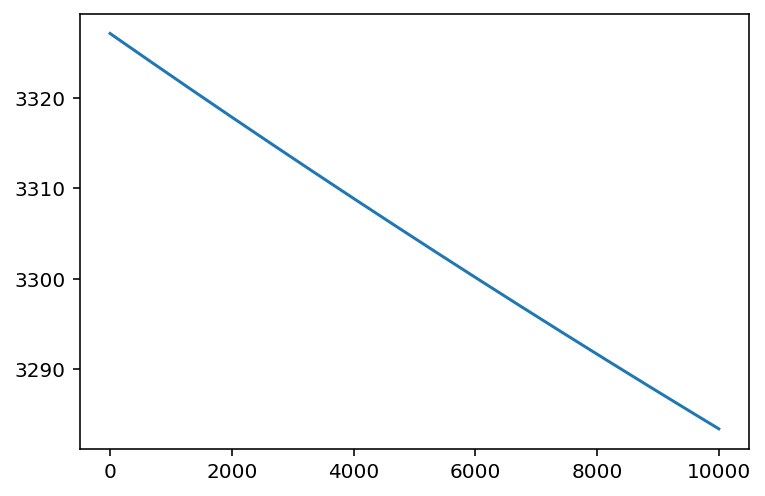

In [111]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

2996.5772773516032


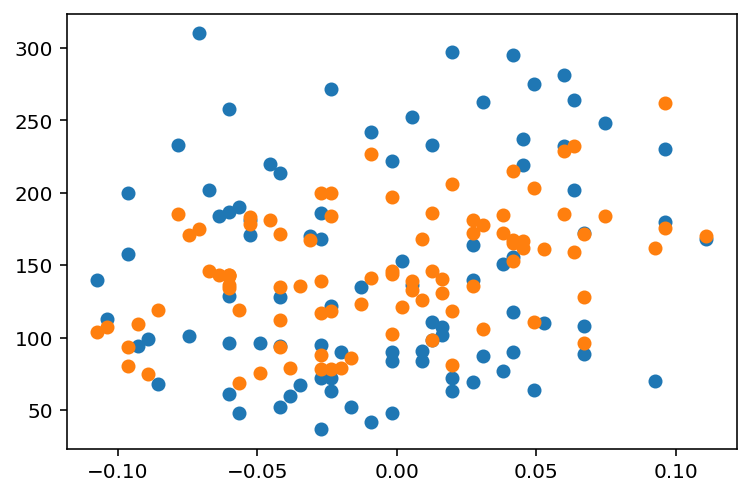

In [115]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

print(mse)

plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()